**Construction of Python function to Design the SLAG in Electro-Slag Remelting through Thermodynamic Modeling**

*[Reference -: "A Thermodynamic Model to Design the Equilibrium Slag Composition during Electroslag remelting Process : Description and Verification",  Shi-jian Ll,   ISIJ International, Vol. 57 (2017), No. 4, pp. 713–722*

In [2]:
from scipy.optimize import fsolve

*Declaring input variables*

In [7]:
C=float(input("Please enter electrode Carbon content: \n"))
Al=float(input("Please enter electrode Aluminium content: \n"))
Si=float(input("Please enter electrode Silicon content: \n"))
Mn=float(input("Please enter electrode Manganese content: \n"))
Cr=float(input("Please enter electrode Chromium content: \n"))
S=float(input("Please enter electrode Sulphur content: \n"))
P=float(input("Please enter electrode Phosphorus content: \n"))
O=float(input("Please enter electrode Oxygen content: \n"))
CaO=float(input("Please enter wt% CaO : \n"))
CaF2=float(input("Please enter wt% CaF2 : \n"))
MgO=float(input("Please enter wt% MgO : \n"))
Wslag=float(input("Please enter the slag weight(g) : \n"))

Please enter electrode Carbon content: 
0.21
Please enter electrode Aluminium content: 
0.018
Please enter electrode Silicon content: 
0.31
Please enter electrode Manganese content: 
0.62
Please enter electrode Chromium content: 
0.60
Please enter electrode Sulphur content: 
0.002
Please enter electrode Phosphorus content: 
0.011
Please enter electrode Oxygen content: 
0.0020
Please enter wt% CaO : 
5.10
Please enter wt% CaF2 : 
49.69
Please enter wt% MgO : 
5.13
Please enter the slag weight(g) : 
49500


*Calculating Activity Coefficients*

In [8]:
fAl=pow(10,0.091*C+0.056*Si+0.03*S+0.044635878*Al+0.012*Cr-6.597784303*O)
fMn=pow(10,-0.07*C-0.048*S+0.0039*Cr-0.083*O)
fSi=pow(10,0.179883075*C+0.107419648*Si+0.0028*Mn+0.056*S+0.58*Al-0.0003*Cr-0.23*O)
fO=pow(10,-0.436*C-0.131*Si-0.021*Mn-0.133*S-3.848398292*Al-0.0459*Cr-0.200329952*O)

In [9]:
print("fAl:",fAl)
print("fSi:",fSi)
print("fMn:",fMn)
print("fO:",fO)

fAl: 1.0748252915485617
fSi: 1.2098277357007114
fMn: 0.9713550446742312
fO: 0.5719159002350558


In [10]:
nCaO=(CaO*Wslag)/(5600)
nCaF2=(CaF2*Wslag)/(7800)
nMgO=(MgO*Wslag)/(4000)

*Calculate the mass action concentration of every structural unit (ratio of equilibrium mole number to the total mole numbers)*

In [11]:
def eq(vars):
    N1, N2, N3, N4, N5, N6, N7, O, ni = vars
    
    eq1 = ((fAl*fAl*Al*Al*fO*fO*fO*O*O*O*(39790555298439.2993))/N4)-1
    
    eq2 = ((fSi*Si*fO*fO*O*O*(43651.58322))/N5)-1
    
    eq3 = ((fMn*Mn*fO*O*(22.49054606))/N7)-1
    
    eq4 = ((fO*O*(4.365158322))/N2)-1
    
    eq5 = nCaO-(ni*((0.5)*(N1)+(435.5012)*(N1)*(N5)+(2)*(11794.12)*(N1**2)*(N5)+(3)*(6410.8113)*(N1**3)*(N5)+(30.0606)*(N1)*(N4)+(71.99)*(N1)*(N4**2)+(268.725)*(N1)*(N4**6)+(3)*(139.8575)*(N1**3)*(N4)+(12)*(13030894969373.32518)*(N1**12)*(N4**7)+(1917.86)*(N1)*(N5)*(N6)+(89917.2452)*(N1)*(N5**2)*(N6)+(2*239542.0967)*(N1**2)*(N5**2)*(N6)+(3)*(31875187.33)*(N1**3)*(N5**2)*(N6)+(2)*(75419.9506)*(N1**2)*(N4)*(N5)+(1872.5899)*(N1)*(N4)*(N5**2)+(3)*(35084319.96)*(N1**3)*(N3)*(N5**2)+(3)*(115331.917)*(N1**3)*(N3)*(N4**3)+(11)*(329906557103762.3524)*(N1**11)*(N3)*(N4**7)))
    
    eq6 =nCaF2-(ni*((0.33)*(N3)+(35084319.96)*(N1**3)*(N3)*(N5**2)+(115331.917)*(N1**3)*(N3)*(N4**3)+(329906557103762.3524)*(N1**11)*(N3)*(N4**7)))
    
    eq7 =nMgO-(ni*((0.5)*(N6)+(7.5695)*(N5)*(N6)+(2)*(38.3803)*(N5)*(N6**2)+(12.5915)*(N4)*(N6)+(1917.8608)*(N1)*(N5)*(N6)+(89917.2452)*(N1)*(N5**2)*(N6)+(239542.0967)*(N1**2)*(N5**2)*(N6)+(31875187.33)*(N1**3)*(N5**2)*(N6)))
    
    eq8 =(N1+N2+N3+N4+N5+N6+N7-1)
    eq9 =100-(((56)*(N1)+(72)*(N2)+(78)*(N3)+(102)*(N4)+(60)*(N5)+(40)*(N6)+(71)*(N7))*ni)


    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9]


In [18]:
N1, N2, N3, N4, N5, N6, N7, O, ni =fsolve(eq,(0.1488,0.00051,0.4595,0.4156,0.0130,0.0851,0.00182,0.0050,1671))

D:\Programme_files\Anaconda\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


*1st Output - Slag Mole Fraction*

In [19]:
print('NCaO'  ,N1)
print('NFeO'  ,N2)
print('NCaF2' ,N3)
print('NAl2O3',N4)
print('NSiO2' ,N5)
print('NMgO'  ,N6)
print('NMnO'  ,N7)
print('O'     ,O)
print('ni'    ,ni)
print('NAl2O3+NSiO2+NMgO+NFeO+NMnO+NCaO+NCaF2',N1+N2+N3+N4+N5+N6+N7)


NCaO 0.2430958977941945
NFeO 0.0008886746721367663
NCaF2 0.5401194631921516
NAl2O3 0.14243266585574593
NSiO2 0.00866343531867801
NMgO 0.0620750451854396
NMnO 0.002896067615093399
O 0.0007218448523698192
ni 0.1729542472388384
NAl2O3+NSiO2+NMgO+NFeO+NMnO+NCaO+NCaF2 1.0001712496334398


In [20]:
wtpercentCaO=CaO
wtpercentCaF2=CaF2
wtpercentMgO=MgO
wtpercentFeO=(N2*72*250*100)/(Wslag)
wtpercentMnO=(N7*71*250*100)/(Wslag)
wtpercentSiO2=(N5*60*2700*100)/(Wslag)

In [21]:
wtpercentAl2O3=100-CaO-CaF2-MgO-wtpercentFeO-wtpercentMnO-wtpercentSiO2

In [22]:
CaO+MgO+CaF2+wtpercentFeO+wtpercentSiO2+wtpercentMnO+wtpercentAl2O3 <= 100

True

*2nd Output - Slag wt.% at equilibrium*

In [23]:
if CaF2<40:
    print('The equilibrium wt% FeO  :', round((wtpercentFeO),3))

print('The equilibrium wt% Al2O3:', round((wtpercentAl2O3),2))
print('The equilibrium wt% SiO2 :', round((wtpercentSiO2),2))

print('The equilibrium wt% MnO  :', round((wtpercentMnO),3))
print('The Oxygen content (ppm) :', round((O*10000),2))
print('The ∑Ni (Mole fraction of basic slag units:', round((N1+N2+N3+N4+N5+N6+N7),3))

The equilibrium wt% Al2O3: 37.11
The equilibrium wt% SiO2 : 2.84
The equilibrium wt% MnO  : 0.104
The Oxygen content (ppm) : 7.22
The ∑Ni (Mole fraction of basic slag units: 1.0


**Model shows good accuracy with increased trend of SiO2 towards the end of re-melting stage when compared with the literature**

In [27]:
data = {'Slag Component After': [' Al2O3', 'SiO2', 'MnO'],
        'wt%': [37.02,2.80,0.36]}

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(data, index=['Al2O3',
                               'SiO2',
                               'MnO',])

In [31]:
data = [{'Al2O3': 37.02, 'SiO2': 2.80, 'MnO': 0.36},
        {'Al2O3': 37.11, 'SiO2': 2.84, 'MnO': 0.104}]

In [34]:
df = pd.DataFrame(data, index=['Literature-Experiment',
                               'Python Prediction',
                               ])

In [35]:
df

,Al2O3,SiO2,MnO
Literature-Experiment,37.02,2.80,0.360
Python Prediction,37.11,2.84,0.104


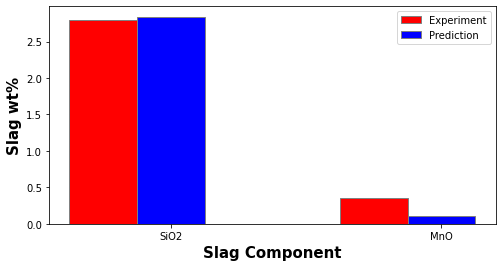

In [66]:
Experiment = [2.80,0.36]
Prediction    = [2.84,0.104]

barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))

br1 = np.arange(len(Experiment))
br2 = [x + barWidth for x in br1]

plt.bar(br1, Experiment, color ='r', width = barWidth, edgecolor ='grey', label ='Experiment')
plt.bar(br2, Prediction, color ='b', width = barWidth,edgecolor ='grey', label ='Prediction')

plt.xlabel('Slag Component', fontweight ='bold', fontsize = 15)
plt.ylabel('Slag wt%', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Experiment))],
        [ 'SiO2', 'MnO'])

plt.legend()
plt.show()

 **This prediction is beneficial to the homogeneity and cleanliness of the refined ingot.
    This model can be used as a guideline to optimize deoxidation practice during industrial ESR process. 
    Based on prediction, Aluminium can be calculated and added during remelting to kill oxygen and reduce oxide inclusions**